In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [10]:
data = pd.read_csv('../day5/data/k-means.csv')
data.head()

,x,y
0,25,79
1,34,51
2,22,53
3,27,78
4,33,59


In [11]:
model = KMeans(n_clusters=3, random_state=0)
model.fit(data)

KMeans(n_clusters=3, random_state=0)

In [12]:
print("model labels")
print(model.labels_)

model labels
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2]


In [14]:
data_bmx = pd.read_csv('../day5/data/kmeans_bmx.csv')
data_bmx.head()

,Unnamed: 0,seqn,bmdstats,bmxwt,bmiwt,bmxrecum,bmirecum,bmxhead,bmihead,bmxht,...,bmxarmc,bmiarmc,bmxwaist,bmiwaist,bmxsad1,bmxsad2,bmxsad3,bmxsad4,bmdavsad,bmdsadcm
0,1,62161,1,69.2,NaN,NaN,NaN,NaN,NaN,172.3,...,32.5,NaN,81.0,NaN,17.7,17.9,NaN,NaN,17.8,NaN
1,2,62162,1,12.7,NaN,95.7,NaN,NaN,NaN,94.7,...,16.6,NaN,45.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,62163,1,49.4,NaN,NaN,NaN,NaN,NaN,168.9,...,22.0,NaN,64.6,NaN,15.6,15.5,NaN,NaN,15.6,NaN
3,4,62164,1,67.2,NaN,NaN,NaN,NaN,NaN,170.1,...,29.3,NaN,80.1,NaN,18.3,18.5,NaN,NaN,18.4,NaN
4,5,62165,1,69.1,NaN,NaN,NaN,NaN,NaN,159.4,...,29.7,NaN,86.7,NaN,21.0,20.8,NaN,NaN,20.9,NaN


In [16]:
data_bmx.isna().any()

Unnamed: 0    False
seqn          False
bmdstats      False
bmxwt          True
bmiwt          True
bmxrecum       True
bmirecum       True
bmxhead        True
bmihead        True
bmxht          True
bmiht          True
bmxbmi         True
bmdbmic        True
bmxleg         True
bmileg         True
bmxarml        True
bmiarml        True
bmxarmc        True
bmiarmc        True
bmxwaist       True
bmiwaist       True
bmxsad1        True
bmxsad2        True
bmxsad3        True
bmxsad4        True
bmdavsad       True
bmdsadcm       True
dtype: bool

In [18]:
data_bmx = data_bmx[['bmxleg', 'bmxwaist']].dropna()
data_bmx.head()

,bmxleg,bmxwaist
0,40.2,81.0
2,40.3,64.6
3,40.5,80.1
4,42.1,86.7
5,31.0,59.8


In [19]:
model = KMeans(n_clusters=4)
model.fit(data_bmx)

KMeans(n_clusters=4)

In [20]:
centroids = model.cluster_centers_
print('Centroids:\n', centroids)

Centroids:
 [[ 38.58551724 124.26471264]
 [ 36.06514012  67.38564593]
 [ 38.88664568 102.34366007]
 [ 38.73492741  85.20431255]]


Text(0, 0.5, 'Waist size (cm)')

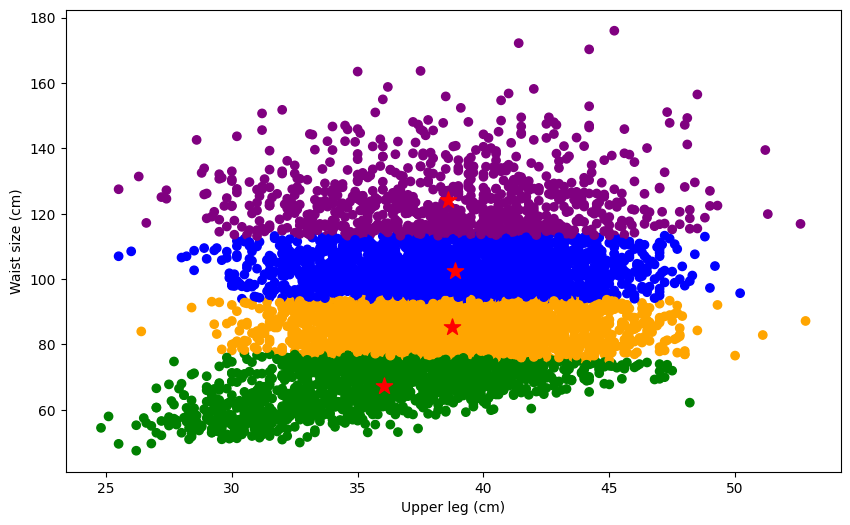

In [23]:
clusters = model.predict(data_bmx)
clusters_colors = ['purple', 'green', 'blue', 'orange']
data_colors = []
for i in clusters:
    data_colors.append(clusters_colors[i])

plt.figure(figsize=(10,6))
plt.scatter(data_bmx['bmxleg'], data_bmx['bmxwaist'], c=data_colors)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', color='r', s=150)
plt.xlabel("Upper leg (cm)")
plt.ylabel("Waist size (cm)")